# **Homework Data Preprocessing - Final Project Stage 2**
## **Kelompok BlueCode**

*   Agustina Sri Wardani
*   Fatchul Arifin
*   Ferry Setefanus
*   Gigih Septian
*   Kornelius Rio
*   M. Harun Arrasyid
*   Raza Aqil Maulana

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
from dython.nominal import associations
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

Load dataset

In [ ]:
#Drive Raza
df = pd.read_csv('/content/drive/MyDrive/Rakamin/hotel_bookings.csv')

In [ ]:
#drive ferry
df = pd.read_csv('/content/drive/MyDrive/data science/final project/hotel_booking.csv')

In [ ]:
#drive fatchul
df= pd.read_csv ('/content/drive/MyDrive/finpro/hotel_booking.csv')

In [ ]:
#drive tina
df = pd.read_csv('/content/drive/MyDrive/RAKAMIN-FINPRO/hotel_booking.csv')

In [ ]:
#drive gigih
df = pd.read_csv('/content/drive/My Drive/Final Project - Kelompok 2/Dataset/hotel_booking.csv')

In [ ]:
#drive acid
df = pd.read_csv('/content/drive/MyDrive/hotel_booking.csv')

NameError: ignored

Handling Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#cek data kosong
counts = df.isna().sum().sort_values(ascending=False)
#cek persen data kosong
percentages = round(df.isna().mean() * 100, 3).sort_values(ascending=False)
#gabungkan
null_values = pd.concat([counts, percentages], axis=1, keys=["count", "%"])
null_values

,count,%
company,112593,94.307
agent,16340,13.686
country,488,0.409
children,4,0.003
hotel,0,0.000
booking_changes,0,0.000
deposit_type,0,0.000
days_in_waiting_list,0,0.000
customer_type,0,0.000
adr,0,0.000


In [ ]:
#Handling Missing Values
df = df.dropna(subset=['children'])

In [ ]:
df['country']= df['country'].fillna(df['country'].mode()[0])
df.drop('company', axis = 1, inplace=True)
df.drop('agent', axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal            

Dari hasil informasi table diatas, missing values sudah berhasil dilakukan handling data.

In [ ]:
#handling duplicated data
df.duplicated().any()

False

Karena tidak ada duplicated data, maka tidak ada perlakuan handling duplicated data

### Adjust Data Type

In [ ]:
# children jd int
df['children'] = df['children'].astype(int)

# reservation_status_date jd datetime 
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


### Handle Outlier

Handle Outlier pada fitur 'adr' menggunakan ZScore

In [ ]:
#pengelompokan kolom berdasarkan jenis
nums = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
cats = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card'] 

In [ ]:
# pengelompokkan columns berdasarkan jenis columns (untuk visualisasi tidak menyertakan kolom 'name', 'email', 'phone-number', 'credit_card')
cat = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
num = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces']

In [ ]:
#mengubah value minus di adr menjadi nol (0)

def adr_zero(x):
  if x['adr'] < 0:
    adr = 0
  else:
    adr = x['adr']
  return adr

df['adr'] = df.apply(lambda x: adr_zero(x), axis=1)

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in num:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 119386
Jumlah baris setelah memfilter outlier: 97372


### Feature Transformation

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

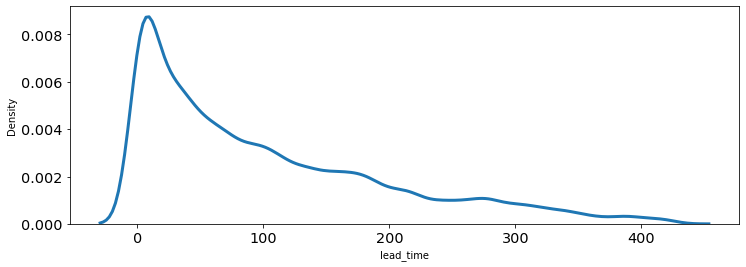

In [ ]:
sns.kdeplot(df['lead_time'])

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

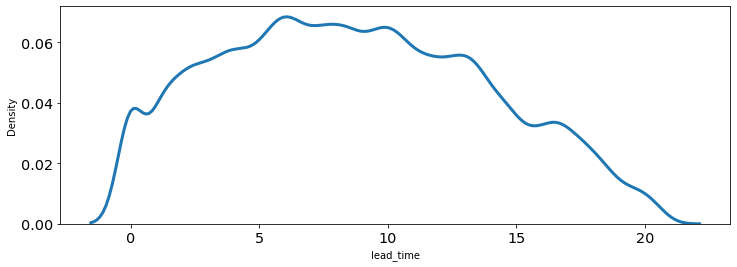

In [ ]:
sns.kdeplot(np.sqrt(df['lead_time']))

In [ ]:
df['lead_time_sqrt'] = np.sqrt(df['lead_time'])

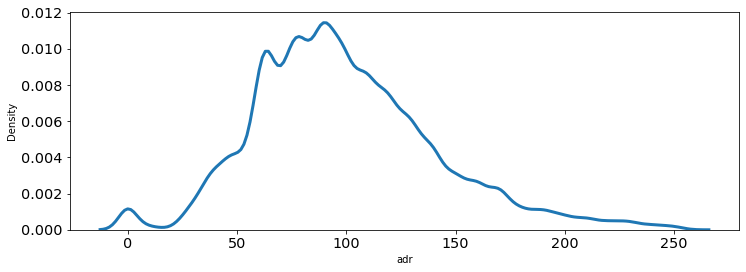

In [ ]:
sns.kdeplot(df['adr'])

Kolom ADR tidak dilakukan transformasi karena sudah mendekati normal

In [ ]:
df['lead_time_norm'] = MinMaxScaler().fit_transform(df['lead_time_sqrt'].values.reshape(len(df), 1))
df['adr_norm'] = MinMaxScaler().fit_transform(df['adr'].values.reshape(len(df), 1))
df['total_of_special_requests_norm'] = MinMaxScaler().fit_transform(df['total_of_special_requests'].values.reshape(len(df), 1))

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,lead_time_sqrt,lead_time_norm,adr_norm,total_of_special_requests_norm
count,97372.000000,97372.000000,97372.000000,97372.000000,97372.000000,97372.000000,97372.000000,97372.000000,97372.000000,97372.0,...,97372.000000,97372.000000,97372.000000,97372.000000,97372.0,97372.000000,97372.000000,97372.000000,97372.000000,97372.000000
mean,0.395401,101.958612,2016.155188,27.041357,15.790063,0.879031,2.367816,1.864027,0.039200,0.0,...,0.007507,0.156472,0.584429,99.670749,0.0,0.550908,8.703428,0.422676,0.393442,0.110182
std,0.488939,98.206386,0.710963,13.540208,8.746489,0.865052,1.494550,0.476192,0.194072,0.0,...,0.127686,0.435648,4.692676,41.703703,0.0,0.774027,5.119494,0.248625,0.164622,0.154805
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,71.640000,0.0,0.000000,4.582576,0.222550,0.282793,0.000000
50%,0.000000,71.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,95.000000,0.0,0.000000,8.426150,0.409210,0.375005,0.000000
75%,1.000000,158.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,122.842500,0.0,1.000000,12.569805,0.610444,0.484911,0.200000
max,1.000000,424.000000,2017.000000,53.000000,31.000000,3.000000,8.000000,3.000000,1.000000,0.0,...,4.000000,2.000000,55.000000,253.330000,0.0,5.000000,20.591260,1.000000,1.000000,1.000000


### Feature Encoding

In [ ]:
cats_encode = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type'] 

for col in cats_encode:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column hotel
City Hotel      69069
Resort Hotel    28303
Name: hotel, dtype: int64
------------------------------ 

value counts of column meal
BB           74520
HB           11281
SC           10001
Undefined      942
FB             628
Name: meal, dtype: int64
------------------------------ 

value counts of column market_segment
Online TA        47384
Offline TA/TO    20577
Groups           16916
Direct            8666
Corporate         3276
Complementary      405
Aviation           148
Name: market_segment, dtype: int64
------------------------------ 

value counts of column distribution_channel
TA/TO        82609
Direct       10248
Corporate     4328
GDS            187
Name: distribution_channel, dtype: int64
------------------------------ 

value counts of column deposit_type
No Deposit    84585
Non Refund    12666
Refundable      121
Name: deposit_type, dtype: int64
------------------------------ 

value counts of column customer_type
Transient          72494
Tr

Strategi encoding
* `hotel` \: label encoding
* `meal`, `market_segment`, `distribution_channel`, `deposit_type`, `customer_type` \: One Hot Encoding 

In [ ]:
# label encode
mapping_hotel = {
    'City Hotel' : 0,
    'Resort Hotel' : 1
}


df['hotel'] = df['hotel'].map(mapping_hotel)

In [ ]:
#One Hot Encoding
cats_ohe = ['meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type'] 

for cats in cats_ohe:
    onehots = pd.get_dummies(df[cats], prefix=cats)
    df = df.join(onehots)

In [ ]:
# drop kolom kategori yang asli (karena sudah di-encoding)
df_new = df.drop(columns=['meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type']).copy()

###  Handle Class Imbalance

In [ ]:
#cek value target (is_cancelled)
counts = df['is_canceled'].value_counts()
percent = df['is_canceled'].value_counts(normalize=True)
percentages = df['is_canceled'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, '%': percentages})

,counts,per,%
0,58871,0.604599,60.5%
1,38501,0.395401,39.5%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


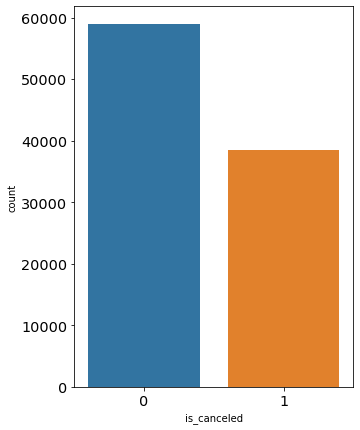

In [ ]:
plt.figure(figsize=(5, 7))
cancel_ax = sns.countplot(df['is_canceled'])
plt.show()

Perbandingan antar kelas fitur target (is_canceled) masih dalam proporsi yang seimbang dan belum masuk kategori imbalance. Jadi tidak perlu melakukan undersampling atau oversampling

## 2. Feature Engineering

### A. Feature Selection

In [ ]:
#cek kolom apa saja yang sudah tidak relevan dan perlu di drop
df_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'country',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card', 'lead_time_sqrt', 'lead_time_norm',
       'adr_norm', 'total_of_special_requests_norm', 'meal_BB', 'meal_FB',
       'meal_HB', 'meal_SC', 'meal_Undefined', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Onl

In [ ]:
### melakukan drop terhadap kolom yang berisikan data pribadi customer karena terlalu banyak unique values
df_new.drop(['name','email','phone-number','credit_card'], axis = 1, inplace=True)

In [ ]:
#cek kembali
df_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'country',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'lead_time_sqrt',
       'lead_time_norm', 'adr_norm', 'total_of_special_requests_norm',
       'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'market_segment_Aviation', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'distribution_channel_Corporate',
     

<AxesSubplot:>

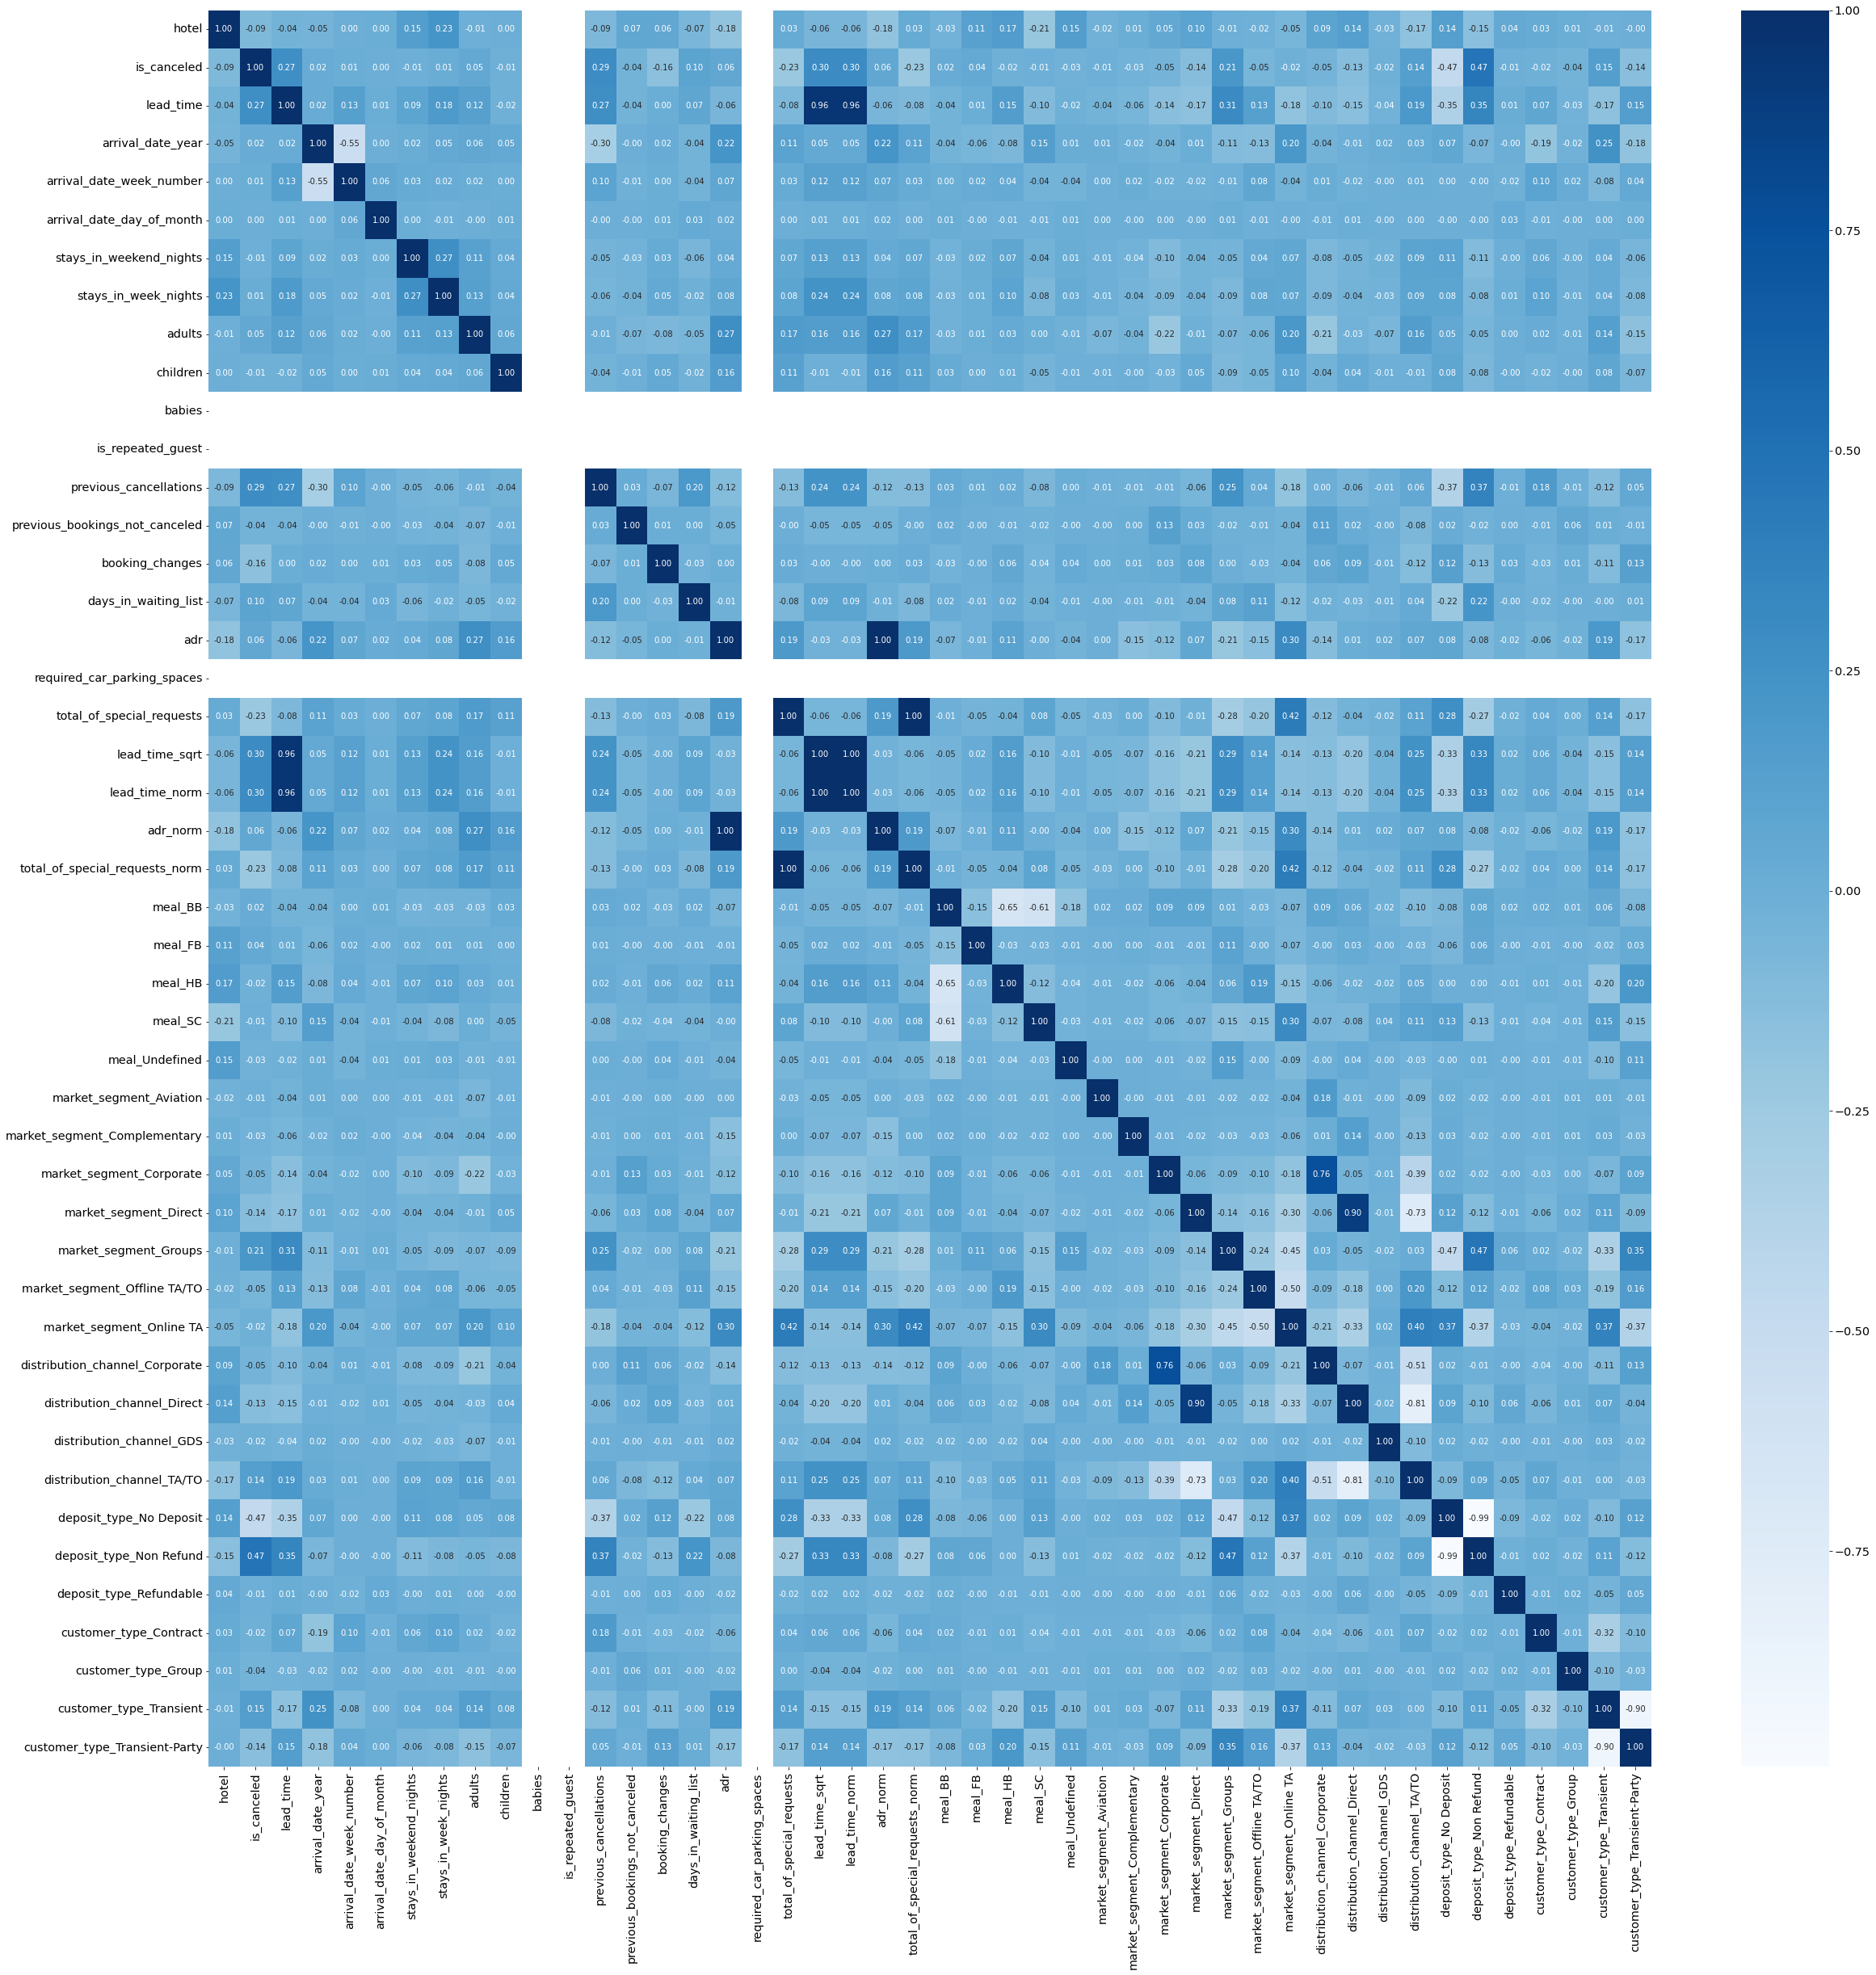

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')

Beberapa kolom yang memiliki redundan (korelasi antar fitur > 0.70) akan didrop, yaitu :
- arrival_date_year dengan reservation status_date (kedua nya akan didrop)
- arrival date week juga akan di drop
- reservation_status akan didrop
- market_segment_direct dengan distribution_channel_direct (akan di drop salah satu, yaitu distribution_channel_direct)
- distribution_channelTA/TO dengan market_segment_direct (distribution_channelTA/TO akan di drop)
- customer_type_Transient dengan customer_type_Transient-Party (customer_type_Transient-Party akan didrop) 
- deposit_type_No Deposit dengan deposit_type_Non Refund (deposit_type_Non Refund akan didrop)

sisanya kolom - kolom yang outdated akan di drop (kolom yang sudah dilakukan transformasi)


In [ ]:
df_new.drop(['arrival_date_year','reservation_status_date','reservation_status','distribution_channel_Direct','distribution_channel_TA/TO','customer_type_Transient-Party','adr','lead_time','lead_time_sqrt','total_of_special_requests','deposit_type_Non Refund'], axis = 1, inplace=True)

<AxesSubplot:>

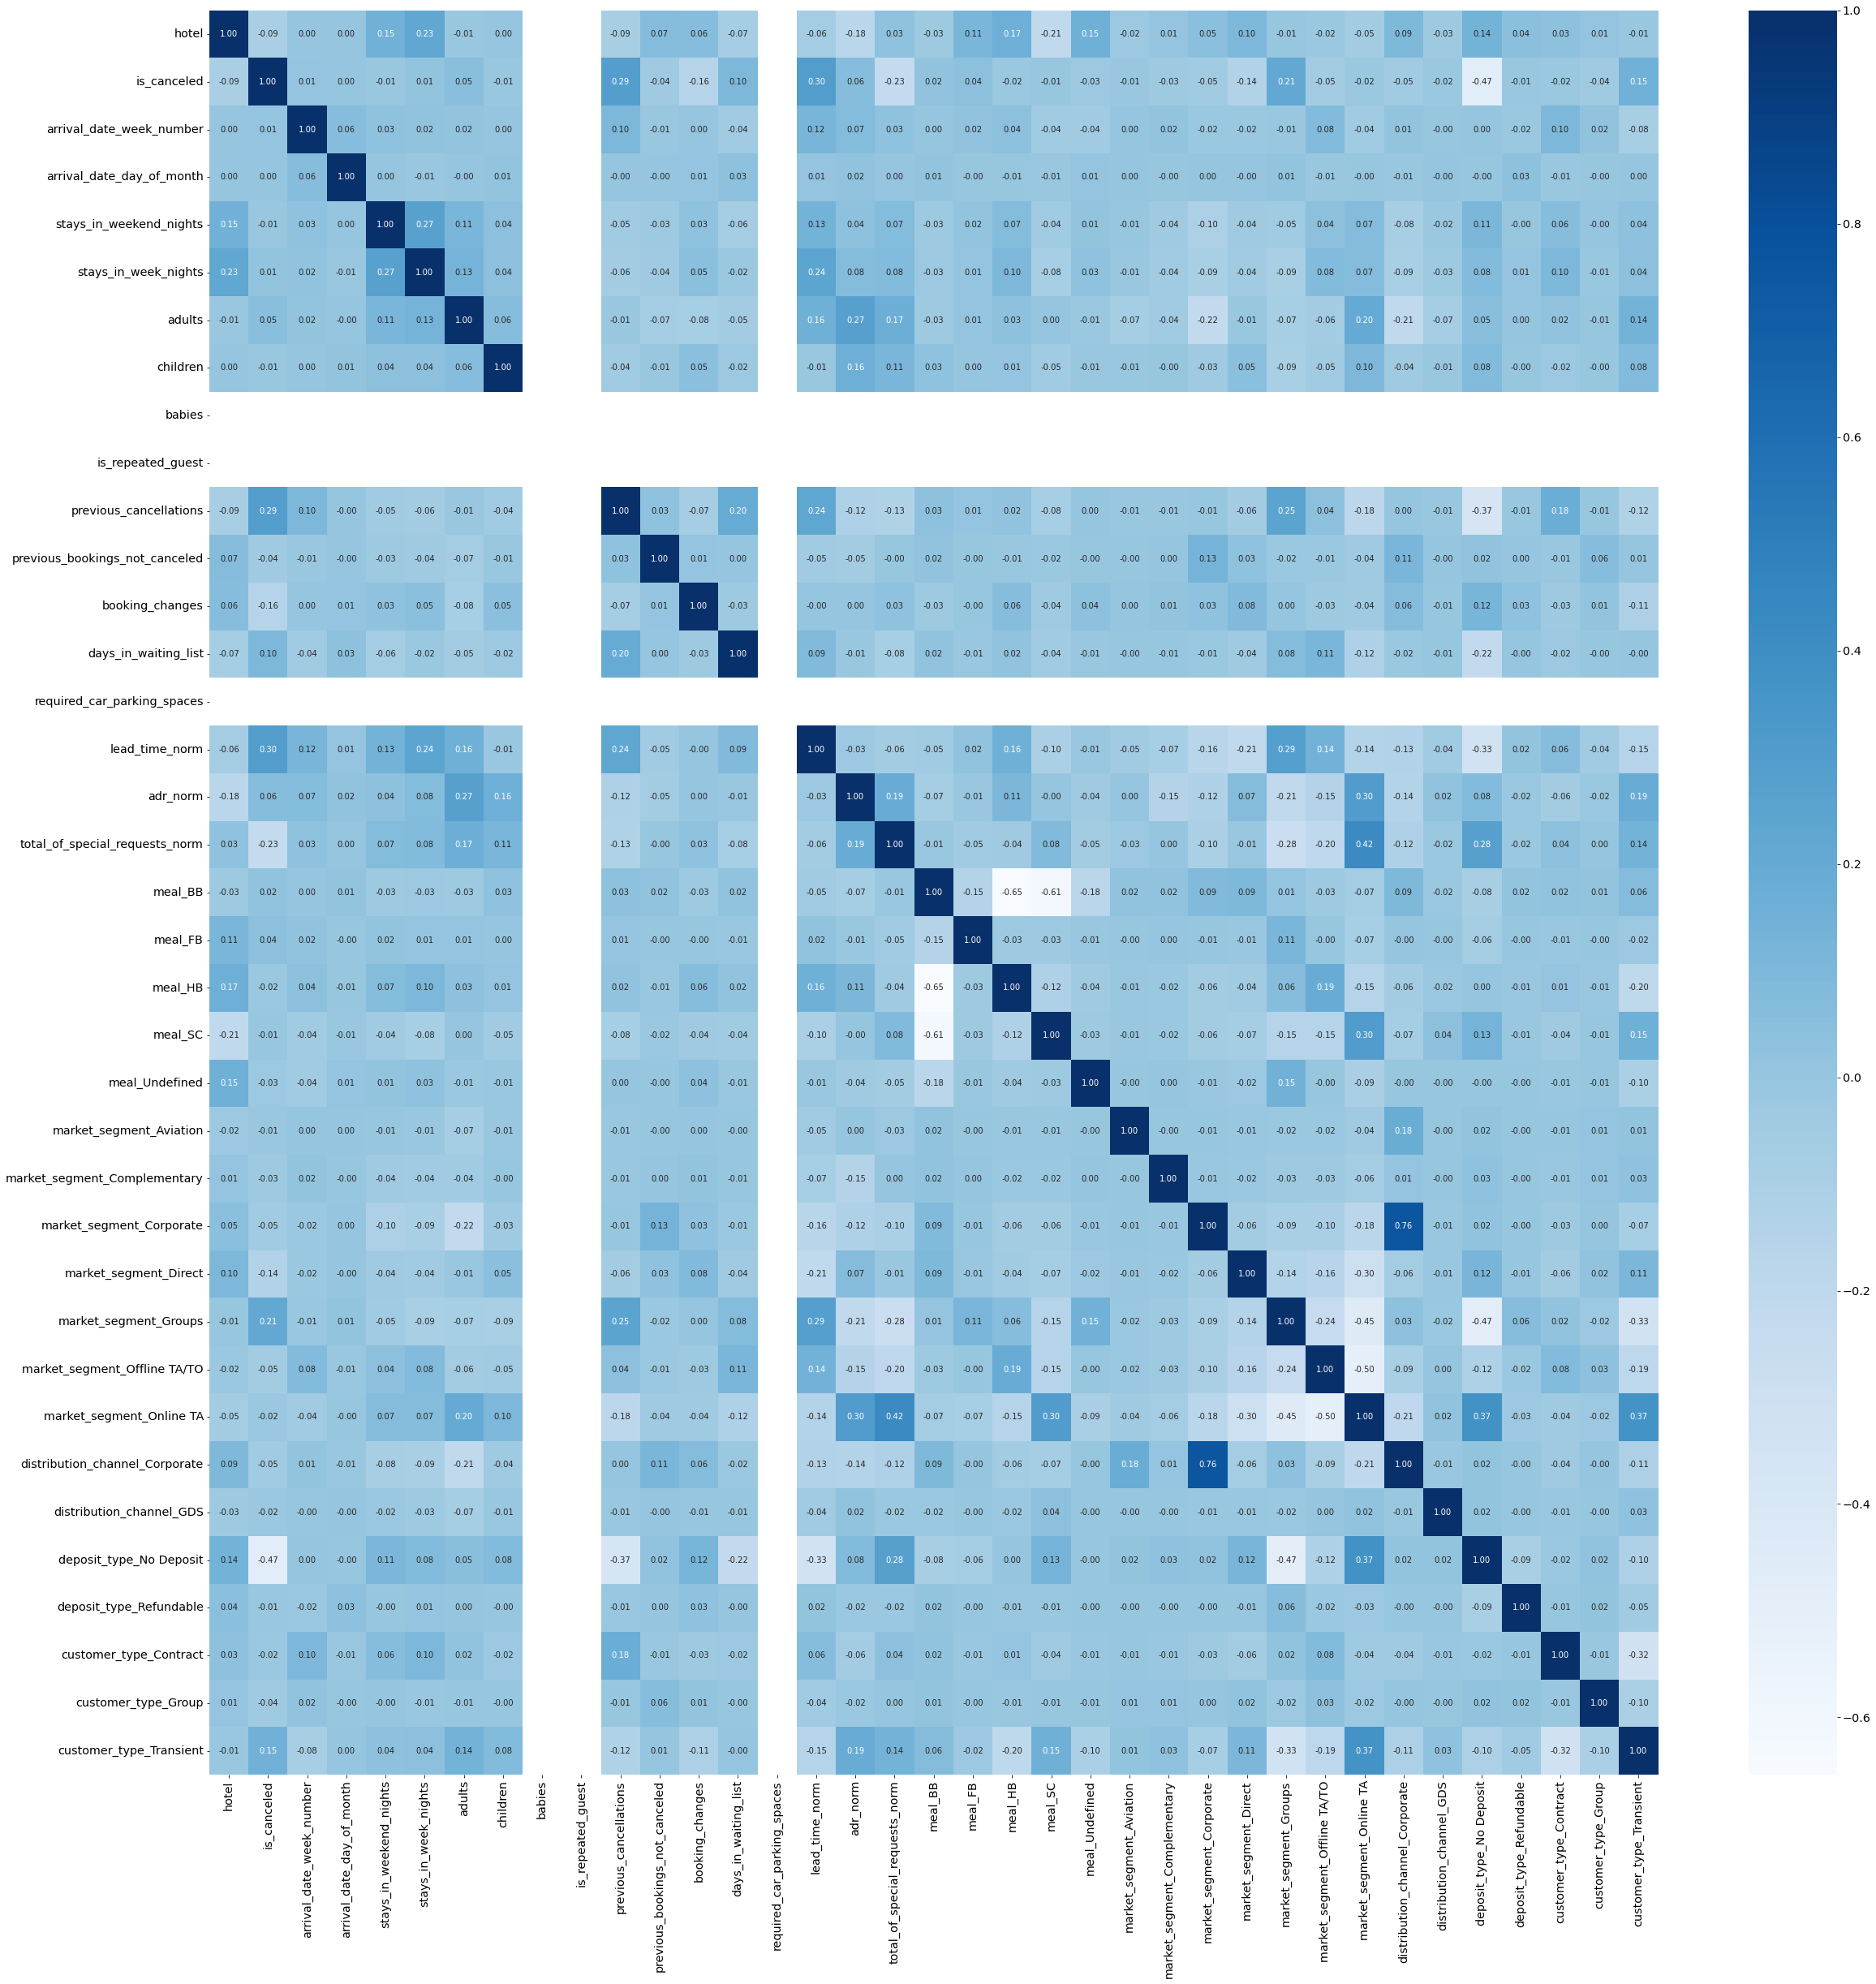

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')

Terlihat sudah tidak ada fitur redundan (korelasi antar fitur dengan nilai >0.70)

In [ ]:
df_new.columns

Index(['hotel', 'is_canceled', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'lead_time_norm', 'adr_norm',
       'total_of_special_requests_norm', 'meal_BB', 'meal_FB', 'meal_HB',
       'meal_SC', 'meal_Undefined', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Corporate', 'distribution_channel_GDS',
       'deposit_type_No Deposit', 'deposit_type_Refundable',
       'customer_type_Contract', 'customer_type_Group',
       'cus

Jadi, kolom yang akan digunakan adalah 'hotel', 'is_canceled', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'lead_time_norm', 'adr_norm',
       'total_of_special_requests_norm', 'meal_BB', 'meal_FB', 'meal_HB',
       'meal_SC', 'meal_Undefined', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Corporate', 'distribution_channel_GDS',
       'deposit_type_No Deposit', 'deposit_type_Refundable',
       'customer_type_Contract', 'customer_type_Group',
       'customer_type_Transient'

### B. Feature Extraction

In [ ]:
#reserved_room_types dan assigned_room_types digabungkan menjadi reserved_vs_assigned (1 untuk reserved == assigned, 0 untuk reserved != assigned)
def reserved_assigned (reserved_room_type, assigned_room_type):
    if (reserved_room_type) == (assigned_room_type):
        reserved_assigned = '1'
    else:
      reserved_assigned = '0'
    return reserved_assigned

df_new['reserved_vs_assigned'] = df_new.apply(lambda x: reserved_assigned(x['reserved_room_type'], x['assigned_room_type']), axis = 1)
df_new['reserved_vs_assigned'].describe()

count     97372
unique        2
top           1
freq      86177
Name: reserved_vs_assigned, dtype: object

In [ ]:
### kolom reserved_room_types dan assigned_room_types akan di drop karena mengandung banyak unique values
df_new.drop(['reserved_room_type','assigned_room_type'], axis=1, inplace=True)

In [ ]:
#kolom season yang didapat dari kolom arrival_date_month
winter = ['December', 'January', 'February']
spring = ['March', 'April', 'May']
summer = ['June', 'July', 'August']

def season(x):
  if x['arrival_date_month'] in winter:
    season = 'winter'
  elif x['arrival_date_month'] in spring:
    season = 'spring'
  elif x['arrival_date_month'] in summer:
    season = 'summer'
  else:
    season = 'autumn'
  return season

df_new['season'] = df_new.apply(lambda x: season(x), axis=1)

In [ ]:
#drop kolom arrival_date_month karena redundant dengan kolom season
df_new.drop('arrival_date_month', axis = 1, inplace = True)

In [ ]:
df_new['season'].value_counts()

summer    30000
spring    27350
autumn    23518
winter    16504
Name: season, dtype: int64

In [ ]:
#One Hot Encoding
cats_ohe = 'season' 
onehots = pd.get_dummies(df_new[cats_ohe], prefix=cats_ohe)
df_new = df_new.join(onehots)

In [ ]:
#kolom turis local dan international di dapat dari kolom country, PRT(portugal) = lokal karena datasetnya berasal dari portugal 

def turis(x):
  if x['country'] == 'PRT':
    turis = 'local'
  else:
    turis = 'international'
  return turis

df_new['origin_type'] = df_new.apply(lambda x: turis(x), axis=1)

In [ ]:
mapping_origin_type = {
    'international' : 0,
    'local' : 1
}

df_new['origin_type'] = df_new['origin_type'].map(mapping_origin_type)

In [ ]:
df_new['origin_type'].describe()

count    97372.000000
mean         0.393327
std          0.488491
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: origin_type, dtype: float64

<AxesSubplot:>

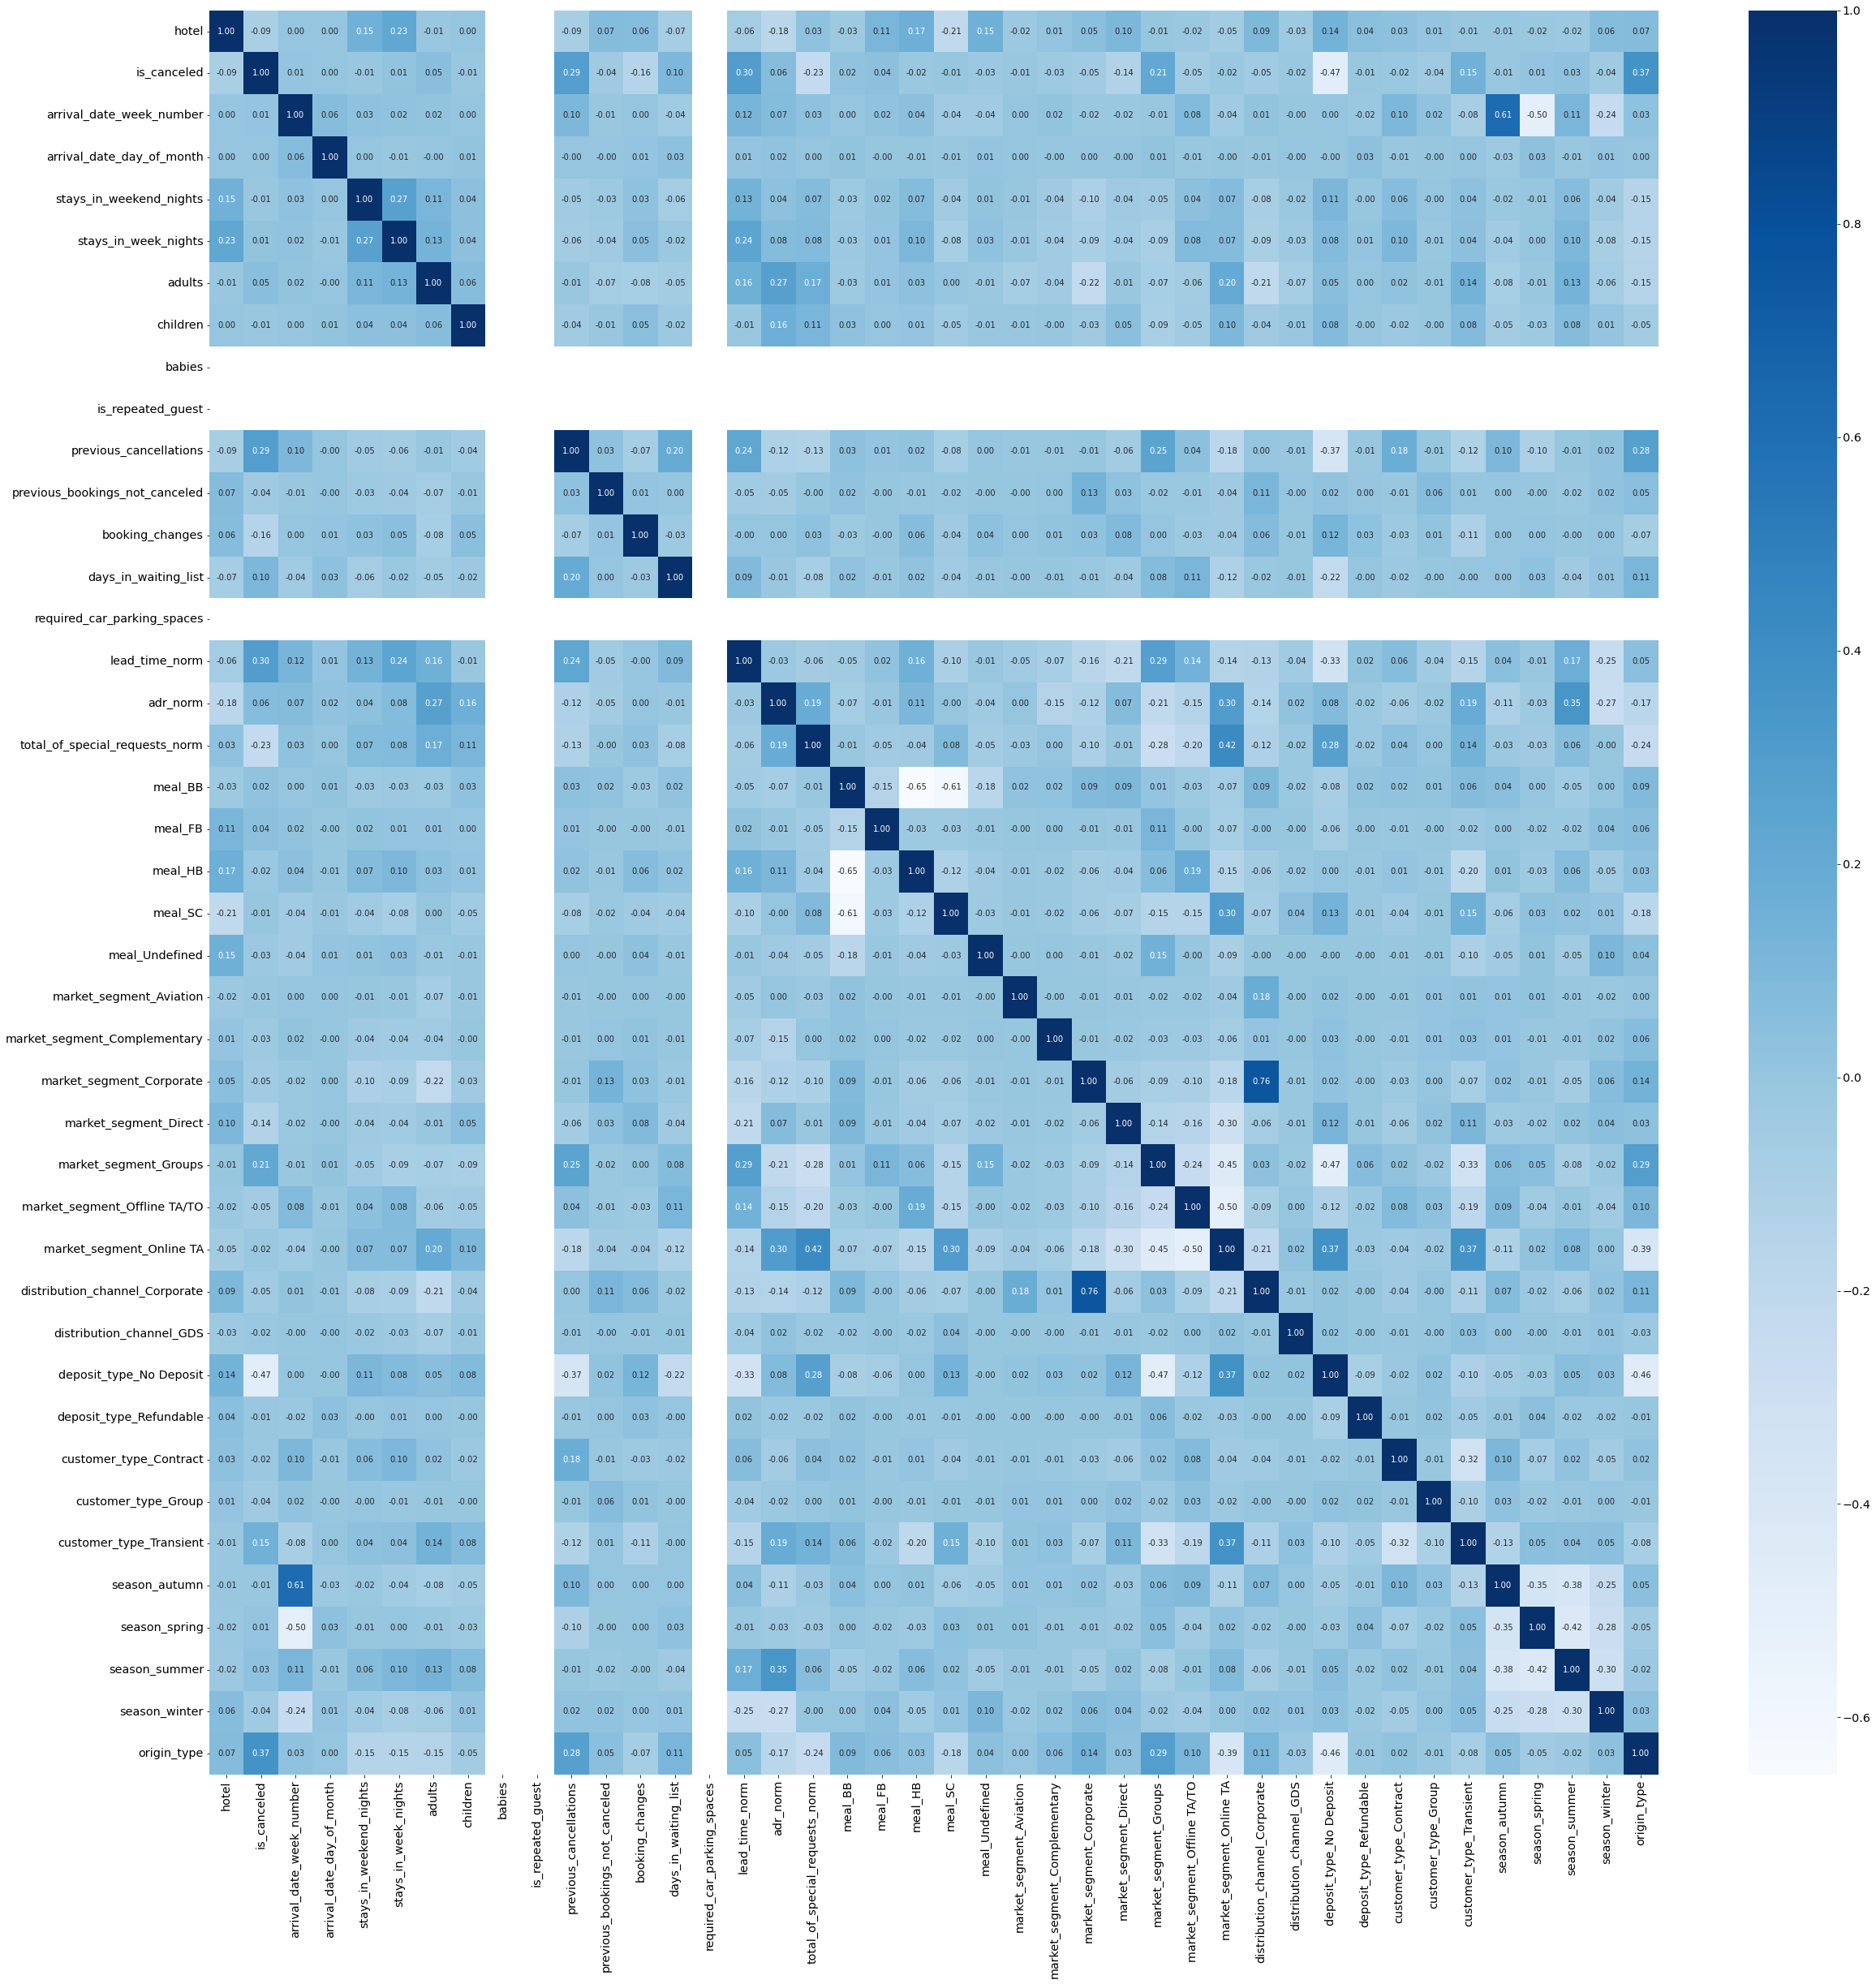

In [ ]:
### cek lagi kolom yang redundan
plt.figure(figsize=(40, 40))
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')

Terlihat sudah tidak ada lagi kolom yang redundan

In [ ]:
df_new.columns

Index(['hotel', 'is_canceled', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'country',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces', 'lead_time_norm',
       'adr_norm', 'total_of_special_requests_norm', 'meal_BB', 'meal_FB',
       'meal_HB', 'meal_SC', 'meal_Undefined', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Corporate', 'distribution_channel_GDS',
       'deposit_type_No Deposit', 'deposit_type_Refundable',
       'customer_type_Contract', 'customer_type_Group',
       'customer_type_Transient', 'reserved_vs_assigned', 'season',
       'season_a

Jadi kolom akhir yang akan digunakan adalah 'hotel', 'is_canceled', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'country',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces', 'lead_time_norm',
       'adr_norm', 'total_of_special_requests_norm', 'meal_BB', 'meal_FB',
       'meal_HB', 'meal_SC', 'meal_Undefined', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Corporate', 'distribution_channel_GDS',
       'deposit_type_No Deposit', 'deposit_type_Refundable',
       'customer_type_Contract', 'customer_type_Group',
       'customer_type_Transient', 'reserved_vs_assigned', 'season',
       'season_autumn', 'season_spring', 'season_summer', 'season_winter',
       'origin_type'

### C. Feature Tambahan

Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan)

- weather
- tags
- rating
- tipe kasur
- price of 2 people
